In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
city_data_to_load.head(5)

ride_data_to_load = pd.read_csv("data/ride_data.csv")
ride_data_to_load.head(5)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_to_load,city_data_to_load,
                                 how='left', on='city')

combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
#Get total number of rides, average fare, and average driver count and group them by city and type

TotalRides = combined_data_df.groupby(["city", "type"])["ride_id"].count()
AvgFare = combined_data_df.groupby(["city", "type"])["fare"].mean()
AvgDriverCount = combined_data_df.groupby(["city", "type"])["driver_count"].mean()


In [80]:
#Create a dataframe displaying the above elements and prepare for plotting, and reset index
New_df = pd.DataFrame({'AvgFare': AvgFare, 'DriverCount': AvgDriverCount, 'TotalRides':TotalRides}).reset_index()
New_df.head()

,city,type,AvgFare,DriverCount,TotalRides
0,Amandaburgh,Urban,24.641667,12,18
1,Barajasview,Urban,25.332273,26,22
2,Barronchester,Suburban,36.422500,11,16
3,Bethanyland,Suburban,32.956111,22,18
4,Bradshawfurt,Rural,40.064000,7,10


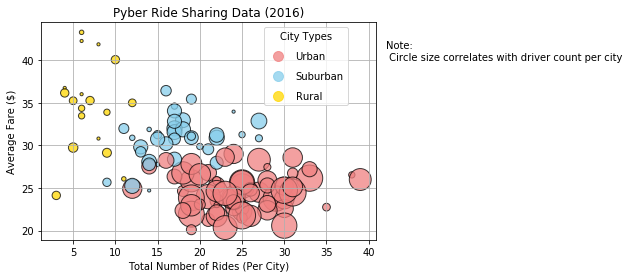

In [185]:
# Bubble Plot of Ride Sharing Data

# Create an array to hold different colors based on type of city

colors = np.where(New_df["type"]== "Urban", "lightcoral", '-')
colors[New_df["type"]== "Suburban"] = "skyblue"
colors[New_df["type"]== "Rural"] = "gold"

#Build Bubble Chart

BubbleChart = plt.scatter(x=TotalRides, 
                          y=AvgFare, 
                          s=AvgDriverCount*10, 
                          marker="o", 
                          c=colors, 
                          edgecolor="black", 
                          alpha=0.75)

#Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
#create arrays to hold legend colords and city types
legend_colors = ["lightcoral", "skyblue", "gold"]
cities = ["Urban", "Suburban", "Rural"]

#create patches
patches = [ plt.plot([], marker="o", ms=10, ls="", color=legend_colors[i], alpha=0.75,
            label=cities[i]) [0]  for i in range(len(cities)) ]


plt.legend(handles=patches, bbox_to_anchor=(0.65, 1), loc='upper left', ncol=1,frameon=True, labelspacing=1, title = "City Types")


# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\n Circle size correlates with driver count per city', horizontalalignment='left')


# Save Figure
plt.savefig("BubblePlotRideSharingData.png")
plt.show()


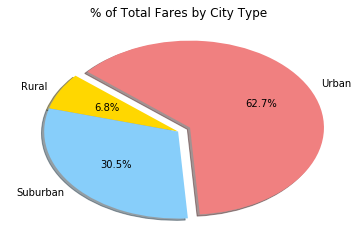

In [186]:
#  % of Total Fares by City Type

cities = ["Rural", "Suburban", "Urban"]
total_fares = combined_data_df.groupby( "type")["fare"].sum()
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_fares, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("TotalFaresbyCityType.png")
plt.show()

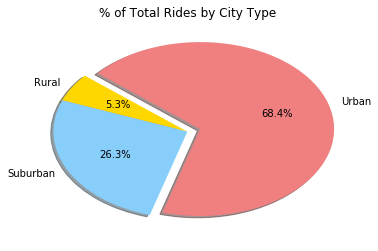

In [187]:
#  % of Total Rides by City Type

cities = ["Rural", "Suburban", "Urban"]
total_rides = combined_data_df.groupby( "type")["ride_id"].count()
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_rides, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("TotalRidesbyCityType.png")
plt.show()

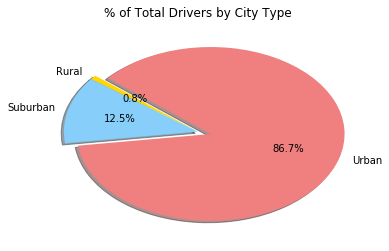

In [188]:
#  % of Total Drivers by City Type

cities = ["Rural", "Suburban", "Urban"]
total_drivers = combined_data_df.groupby( "type")["driver_count"].sum()
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_drivers, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("TotalDriversbyCityType.png")
plt.show()